In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | buraydah
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | freistadt
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | lazaro cardenas
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | ratnagiri
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | nizwa
Processing Record 22 of Set 1 | isangel


Processing Record 41 of Set 4 | kang
Processing Record 42 of Set 4 | mbala
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 44 of Set 4 | mangai
Processing Record 45 of Set 4 | nishihara
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | san angelo
Processing Record 1 of Set 5 | rochester
Processing Record 2 of Set 5 | novo aripuana
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | pangai
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | sao joao batista
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | belmonte
Processing Record 11 of Set 5 | hakkari
Processing Record 12 of Set 5 | grammatikon
City not found. Skipping...
Processing R

Processing Record 27 of Set 8 | gazanjyk
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | ulaanbaatar
Processing Record 31 of Set 8 | paita
Processing Record 32 of Set 8 | pyay
Processing Record 33 of Set 8 | russell
Processing Record 34 of Set 8 | honningsvag
Processing Record 35 of Set 8 | kapuskasing
Processing Record 36 of Set 8 | isla vista
Processing Record 37 of Set 8 | gourdon
Processing Record 38 of Set 8 | vasai
Processing Record 39 of Set 8 | corinto
Processing Record 40 of Set 8 | tessalit
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | bonthe
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | dilla
Processing Record 47 of Set 8 | zverinogolovskoye
Processing Record 48 of Set 8 | emirdag
Processing Record 49 of Set 8 | kijang
Processing Record 50 of Set 8 | nouadhibou
Processing 

Processing Record 16 of Set 12 | wahran
City not found. Skipping...
Processing Record 17 of Set 12 | zhuhai
Processing Record 18 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 20 of Set 12 | dauriya
Processing Record 21 of Set 12 | dryden
Processing Record 22 of Set 12 | bowmore
Processing Record 23 of Set 12 | zhob
Processing Record 24 of Set 12 | suzun
Processing Record 25 of Set 12 | mahebourg
Processing Record 26 of Set 12 | oltu
Processing Record 27 of Set 12 | cayenne
Processing Record 28 of Set 12 | moindou
Processing Record 29 of Set 12 | kizu
City not found. Skipping...
Processing Record 30 of Set 12 | ati
Processing Record 31 of Set 12 | marsa matruh
Processing Record 32 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 33 of Set 12 | ostrovnoy
Processing Record 34 of Set 12 | chapleau
Processing Record 35 of Set 12 | mogadishu
Processing Record 36 of Set 12 | 

In [15]:
len(city_data)

577

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,59.18,59,100,10.71,PT,2021-05-21 14:21:41
1,Buraydah,26.3260,43.9750,109.85,5,24,16.04,SA,2021-05-21 14:21:42
2,Kapaa,22.0752,-159.3190,73.72,74,90,3.00,US,2021-05-21 14:21:42
3,Freistadt,48.5110,14.5045,64.81,54,100,8.10,AT,2021-05-21 14:21:43
4,Sao Filipe,14.8961,-24.4956,75.67,70,29,6.11,CV,2021-05-21 14:21:43
5,Ponta Do Sol,32.6667,-17.1000,79.12,48,7,5.73,PT,2021-05-21 14:21:43
6,Provideniya,64.3833,-173.3000,34.32,76,100,2.66,RU,2021-05-21 14:21:44
7,Lazaro Cardenas,17.9583,-102.2000,76.89,59,0,3.24,MX,2021-05-21 14:21:44
8,Cape Town,-33.9258,18.4232,63.10,69,40,1.99,ZA,2021-05-21 14:20:45
9,Ratnagiri,16.9833,73.3000,84.16,76,16,7.27,IN,2021-05-21 14:21:44


In [18]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-05-21 14:21:41,39.0500,-27.9833,59.18,59,100,10.71
1,Buraydah,SA,2021-05-21 14:21:42,26.3260,43.9750,109.85,5,24,16.04
2,Kapaa,US,2021-05-21 14:21:42,22.0752,-159.3190,73.72,74,90,3.00
3,Freistadt,AT,2021-05-21 14:21:43,48.5110,14.5045,64.81,54,100,8.10
4,Sao Filipe,CV,2021-05-21 14:21:43,14.8961,-24.4956,75.67,70,29,6.11
5,Ponta Do Sol,PT,2021-05-21 14:21:43,32.6667,-17.1000,79.12,48,7,5.73
6,Provideniya,RU,2021-05-21 14:21:44,64.3833,-173.3000,34.32,76,100,2.66
7,Lazaro Cardenas,MX,2021-05-21 14:21:44,17.9583,-102.2000,76.89,59,0,3.24
8,Cape Town,ZA,2021-05-21 14:20:45,-33.9258,18.4232,63.10,69,40,1.99
9,Ratnagiri,IN,2021-05-21 14:21:44,16.9833,73.3000,84.16,76,16,7.27


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

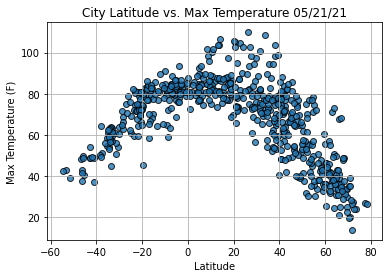

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

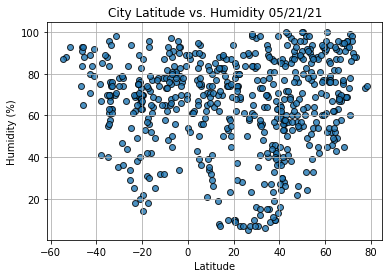

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

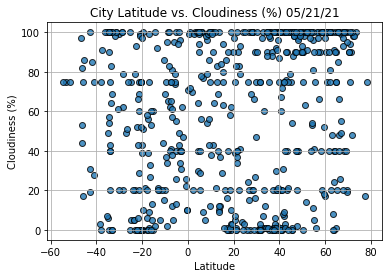

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

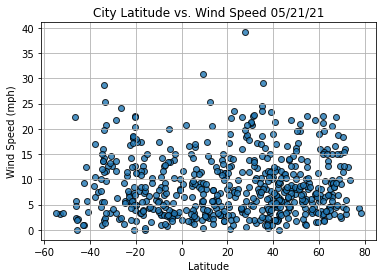

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [63]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "; r = " + str(round(r_value,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [64]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2021-05-21 14:21:46
Lat                         -21.2
Lng                        -175.2
Max Temp                    78.96
Humidity                       89
Cloudiness                     75
Wind Speed                  18.41
Name: 13, dtype: object

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

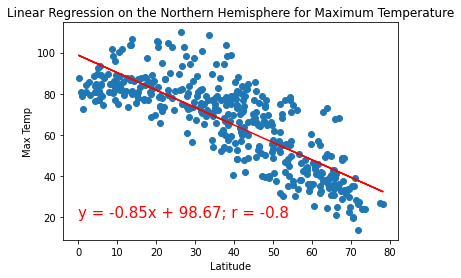

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,20))

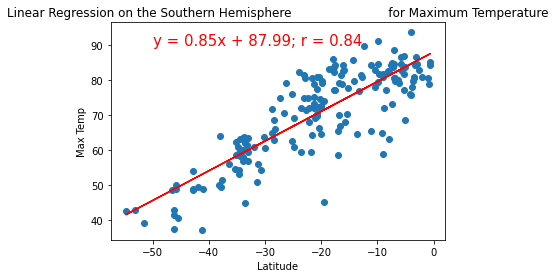

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

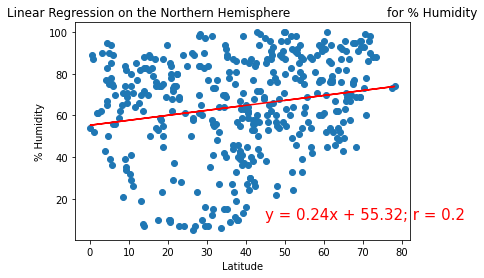

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

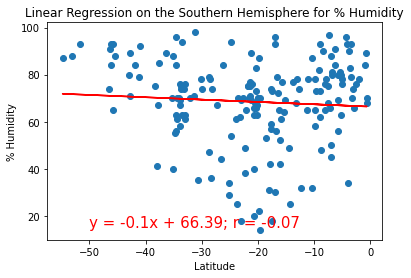

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

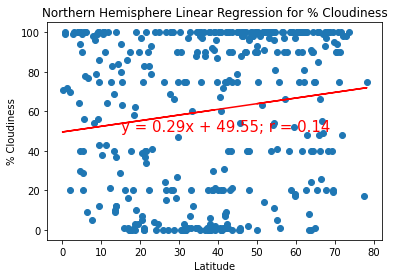

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Northern Hemisphere Linear Regression for % Cloudiness', '% Cloudiness',(15,50))

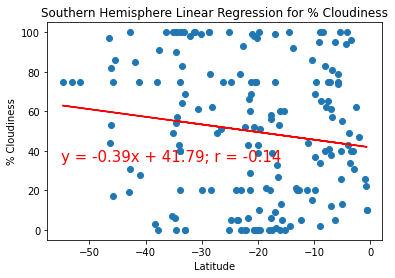

In [71]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Southern Hemisphere Linear Regression for % Cloudiness', '% Cloudiness',(-55, 35))

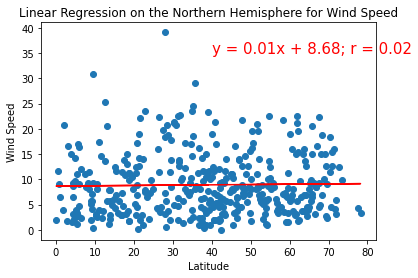

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

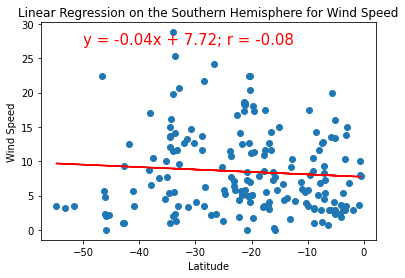

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,27))